# Machine Learning for Data Science - Computer Labs 2024-2025

Professor: Francois PORTIER

Student: Ba-Khuong DANG


## Exercise 1

**Simulation set up**

We will illustrate the blessing of independence with regard to the variance of the mean of sequence of random variables. 

Let $Z$ be a random variable and $Z_i$ is the sequence of realized value of $Z$, with $i\leq1$.

Sample mean of $Z$ is given by: $n^{-1}\sum_{i=1}^n{Z_i}$

The variance of empirical mean will have variance equal to: 

$$\mathbb{E}\left[\left(n^{-1} \sum_{i=1}^n Z_i - \mathbb{E}[Z]\right)^2\right] = \frac{\text{Var}(Z)}{n}=\|\hat{\mu}-\mu\|$$

This represent the L2 distance between the expected value (true value) and the empirical mean value of $Z$. 
- One advantage of this theorem is that it is always true and does not depend on value of $n$ (sample size), which makes it a reliable measurement. 
- The disadvantage of this is that it only shows 1 moment of random variable, which cannot be used to fully characterize $Z$ 

**Python implement**

- We will use `numpy` random generator to generate a sequence of random variable - with predefined mean and variance. 

- To calculate the expected value of $\mathbb{E}\|\hat{\mu}-\mu\|$, we use Monte Carlo simulation with large random sampling to estimate the results. Notice that since $Z_i$ is a sequence of random variable, $\hat{\mu}$ is also a random variable so we can apply this technique to approximate expected value of $\mathbb{E}[\hat{\mu}]$

- To demonstrate the independent of this theorem, we will use 2 different distributions of $Z$: normal distribution and binomial distribution. 


In [2]:
# Loading packages
import numpy as np
import matplotlib.pyplot as plt


# Set parameters
n = np.arange(100, 1010, 100)  # Sample size
nb_simu = 3_000  # Number of MonteCarlo simulation

# Parameters for NormalDistribution
true_mean_norm = 1
true_var_norm = 1
Z_emp_var_norm = []

# Parameters for BinomialDistribution
n_binorm = 10
p_binorm = 0.5
true_mean_binorm = n_binorm * p_binorm
true_var_binorm = n_binorm * p_binorm * (1 - p_binorm)
Z_emp_var_binorm = []


# Loop through different sample size
for size in n:

    l2_norm = []
    l2_binorm = []

    # Run monte-carlo simulation to calculate empirical E[l2]

    # For Normal Distribution
    for _ in range(nb_simu):
        # generate i.i.d random variables
        Z = np.random.normal(
            loc=true_mean_norm, scale=np.sqrt(true_var_norm), size=size
        )
        # calculate L2 norm between empirical mean and theoretical mean
        l2 = (np.mean(Z) - true_mean_norm) ** 2
        l2_norm.append(l2)
    # Empirical expectation of L2 norm
    Z_emp_var_norm.append(np.mean(l2_norm))

    # For Binormial Distribution
    for _ in range(nb_simu):
        # generate i.i.d random variables
        Z = np.random.binomial(n=n_binorm, p=p_binorm, size=size)
        # calculate L2 norm between empirical mean and theoretical mean
        l2 = (np.mean(Z) - true_mean_binorm) ** 2
        l2_binorm.append(l2)
    # Empirical expectation of L2 norm
    Z_emp_var_binorm.append(np.mean(l2_binorm))

# Theoretical variance
Z_var_norm = true_var_norm / n
Z_var_binorm = true_var_binorm / n

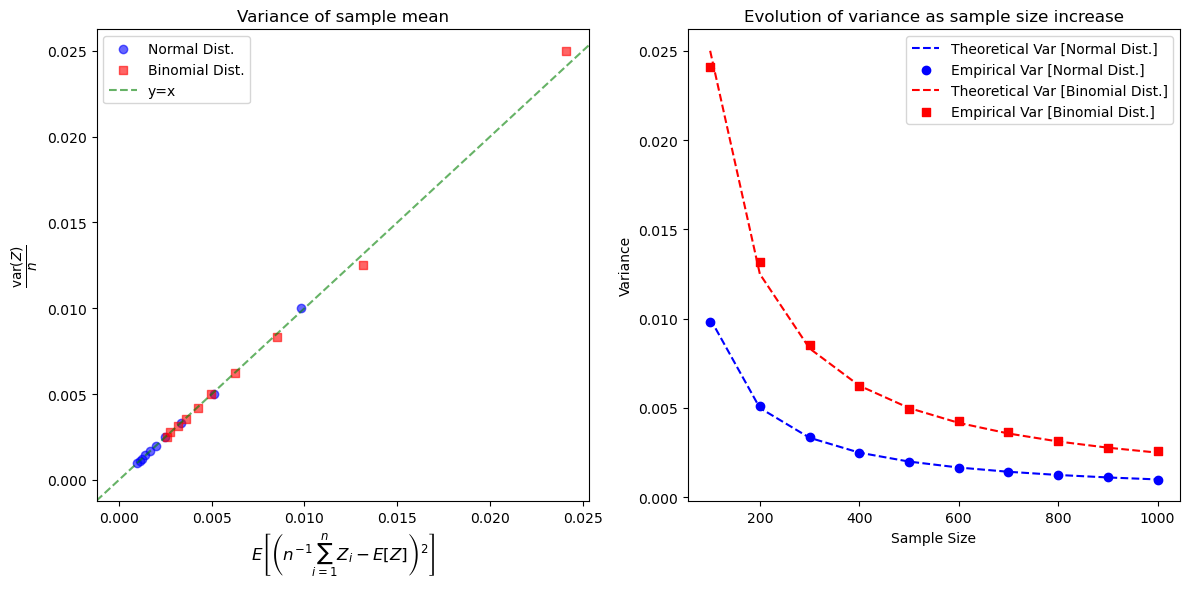

In [3]:
# Plot the result
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))


# Plot comparison of empirical variance vs theoretical variance
# NormalDistribution
axs[0].scatter(Z_emp_var_norm, Z_var_norm, c="blue", alpha=0.6, label="Normal Dist.")

# BinomialDistribution
axs[0].scatter(
    Z_emp_var_binorm, Z_var_binorm, marker="s", c="r", alpha=0.6, label="Binomial Dist."
)

# Line y=x for reference
axs[0].axline((0, 0), slope=1, c="green", linestyle="--", alpha=0.6, label="y=x")
axs[0].set_xlabel(
    r"$E\left[\left(n^{-1}\sum_{i=1}^{n} Z_i - E\left[Z\right]\right)^2\right]$",
    fontsize=12,
)
axs[0].set_ylabel(r"$\frac{\text{var}(Z)}{n}$", fontsize=14)
axs[0].set_title("Variance of sample mean")
axs[0].legend()

# Plot evolution of variance with different sample size
# Normal Distribution
axs[1].plot(n, Z_var_norm, "--", color="blue", label="Theoretical Var [Normal Dist.]")
axs[1].scatter(n, Z_emp_var_norm, c="blue", label="Empirical Var [Normal Dist.]")

# Binomial Distribution
axs[1].plot(
    n, Z_var_binorm, "--", color="red", label="Theoretical Var [Binomial Dist.]"
)
axs[1].scatter(
    n, Z_emp_var_binorm, marker="s", c="red", label="Empirical Var [Binomial Dist.]"
)

axs[1].legend()
axs[1].set_ylabel("Variance")
axs[1].set_xlabel("Sample Size")
axs[1].set_title("Evolution of variance as sample size increase")

plt.tight_layout()
plt.show()

### Conclusion

We can see that regardless of distribution and sample size, we always have: 

$$\mathbb{E}\left[\left(n^{-1} \sum_{i=1}^n Z_i - \mathbb{E}[Z]\right)^2\right] = \frac{\text{Var}(Z)}{n}$$

*Remarks*

In our simulation, we do not have exactly the different between theoretical variance and empirical variance equal 0, and it is because we dont have the exact value of $\mathbb{E}[ \|\hat{\mu}-\mu\| ]$ running Monte carlo simulation. In order to have a reasonable runtime, we limit the `nb_simu = 2000`. If we increase the number of simulation, we will have more and more precise result. 

If we look at the results, we see that the difference is relatively small. 

In [4]:
# Print result
print("=" * 80)
print("Difference: Theoretical Variance - Empirical Variance")
print("Normal Distribution")
print(Z_emp_var_norm - Z_var_norm)

print("Binomial Distribution")
print(Z_emp_var_binorm - Z_var_binorm)

Difference: Theoretical Variance - Empirical Variance
Normal Distribution
[-1.75386018e-04  1.30779442e-04  3.18736091e-05 -2.53691038e-05
 -1.63595443e-05 -1.00991746e-05 -2.55327893e-05 -8.85506931e-06
  6.46847775e-06 -2.95997281e-05]
Binomial Distribution
[-8.86566667e-04  6.50116667e-04  1.76259259e-04  7.52291667e-06
 -2.94693333e-05  8.96370370e-05  6.10979592e-05  4.04807292e-05
 -2.90576132e-05  7.52070000e-05]


## Exercise 2

**Simulation set up** 

We will simulate the effect of **central limit theorem (CLT)** for sequence of random variable, using the same set up sequence as in exercise 1:

- $Z$ is a random variable and $Z_i$ is the sequence of realized value of $Z$, with $i\leq1$.
- Empirical mean of $Z$ is: $n^{-1}\sum_{i=1}^n{Z_i}$

Central Limit Theorem states than with large number of sample $(n\to\infty)$, the distribution of empirical sample mean will converge to a normal distribution with mean equals true mean $(\mathbb{E}[Z])$. Mathematically, we can express:

$$\sqrt{n}(\left(n^{-1} \sum_{i=1}^n Z_i - \mathbb{E}[Z]\right)) \to \mathcal{N}(0, \text{Var}(Z))$$

Unlike the $L_2$ error, CLT only holds for large sample size. The advantage of this theorem is that it fully characterize the distribution. Also, CLT holds for any type of distribution of random variable $Z$

**Python implementation**

Similar to exercise 1, we will implement this theorem using `numpy` random generator, and we use Monte-Carlo simulation method to generate and plot the distribution of $Z$. 

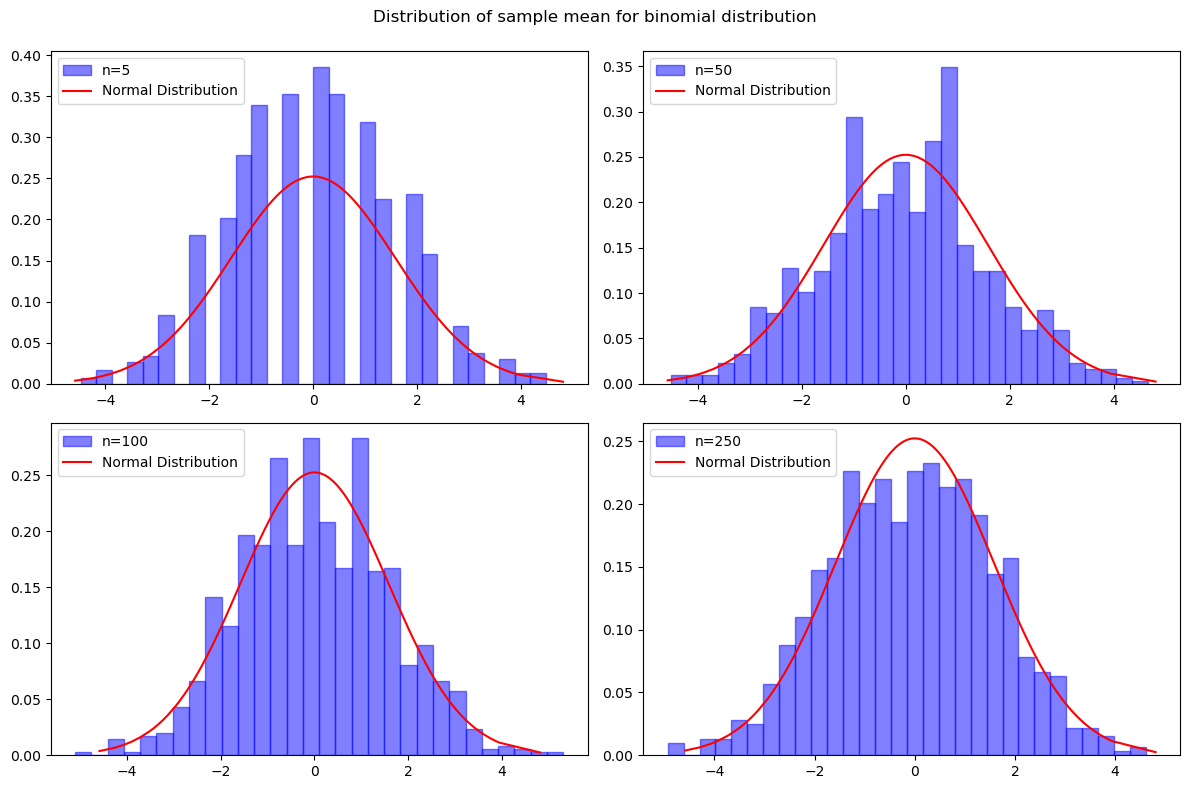

In [5]:
# Loading packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, uniform


np.random.seed(2796)


# Function for generate Normal Distribution
def z_norm(mu, sigma, n):
    """
    Generate sequence of rv with Normal distribution
    Returns:
        Sequence of normal random variable and its pdf
    """
    x = np.random.normal(mu, sigma, n)
    x = np.sort(x)
    y = norm.pdf(x, mu, sigma)  # pdf of x
    return x, y


# Function to generate Binomial Distribution
def z_binom(trial, p, n):
    """
    Generate sequence of rv with Binomial distribution
    Returns:
        Sample mean that is centered.
    """
    Z = np.random.binomial(trial, p, n)
    return (np.mean(Z) - trial * p) * np.sqrt(n)


# Set up parametes
nb_simu = 1_000  # Number of simulation
trial, p, n = 10, 0.5, 500
mu = 0
sigma = (trial * p) * (1 - p)

# Generate Normal Distribution for comparison
x_norm, y_norm = z_norm(0, np.sqrt(sigma), 1000)

# Set up subplot grid (2x2) for each value of n
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for idx, n in enumerate([5, 50, 100, 250]):
    rv_simu = [z_binom(trial, p, n) for _ in range(nb_simu)]
    # Plot Z distribution and Normal distribution
    axs[idx].hist(
        rv_simu,
        bins=30,
        density=True,
        color="blue",
        edgecolor="blue",
        alpha=0.5,
        label=f"n={n}",
    )
    axs[idx].plot(x_norm, y_norm, color="red", label="Normal Distribution")
    # sns.kdeplot(x_norm, ax=axs[idx], color="red", fill=False, label="Y = 0")
    axs[idx].legend(loc="upper left")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle("Distribution of sample mean for binomial distribution")
plt.show()

### Conclusion

We observe that as the sample size $n$ increases, the distribution of the sample mean $\hat{\mu}$ approaches a normal distribution, regardless of the original distribution of $Z$.

## Exercise 3

**Simulation set up** 

We will generate a simulate data for a multinomial logistic regression model. Our model will have 8 predictors $(p = 8)$ and the depedent variable will have 2 categories (0 or 1). 

- $X$ is a random vector in $\R^8$ that follows a Gaussian distribution $X \sim \mathcal{N}(0, I_p)$ with $I_p$ is identity matrix. That means our predictors are i.i.d with mean $0$

- $Y$ follows a Bernoulli distribution with pdf:
$$Y \sim \mathcal{B}(p(X))$$

- The parameter $p$ (the probabily of $Y = 1$) is defined by function of $x_i$:  

$$
p(x_i) = \frac{\exp(x_1 + x_2^2 )}{1 + \exp(x1 + x_2^2 )} 
$$

with: $x_i = (x_1, x_2, ..., x_p)$

- Our parameters are: $n = 3000$ and $p = 8$.

**Python Implementation**

In [14]:
# Prequisition

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Generate multivariate random variable X ~ N(0, I_p)
def generate_data(seed, n, p):
    """
    Generate random data
    Returns:
    X: (n, p) multinormial random variable with n observations and p features
    Y: (n, ) binomial random variable
    """
    mean = np.zeros(p)
    cov = np.identity(p)

    if seed:
        np.random.seed(seed)  # set seed for reproducibitity
    X = np.random.multivariate_normal(mean=mean, cov=cov, size=n)

    # Compute sigmoid function of X p(x) = exp(x1 + x2^2) / (1 + exp(x1 + x2^2))
    x1 = X[:, 0]
    x2 = X[:, 1]
    p_x = np.exp(x1 + x2**2) / (1 + np.exp(x1 + x2**2))

    # Generate Y ~ Bernoulli(p(x))
    Y = np.random.binomial(n=1, p=p_x)

    return X, Y


# Parameters
p = 8  # dimension of the Gaussian vector
n = 3_000  # number of samples

# Generate data
X, Y = generate_data(seed=2796, n=n, p=p)

To study the relationship between $x_i$ with $y$, we can plot the density distribution of each $x_i$ for $y=0$ and $y=1$

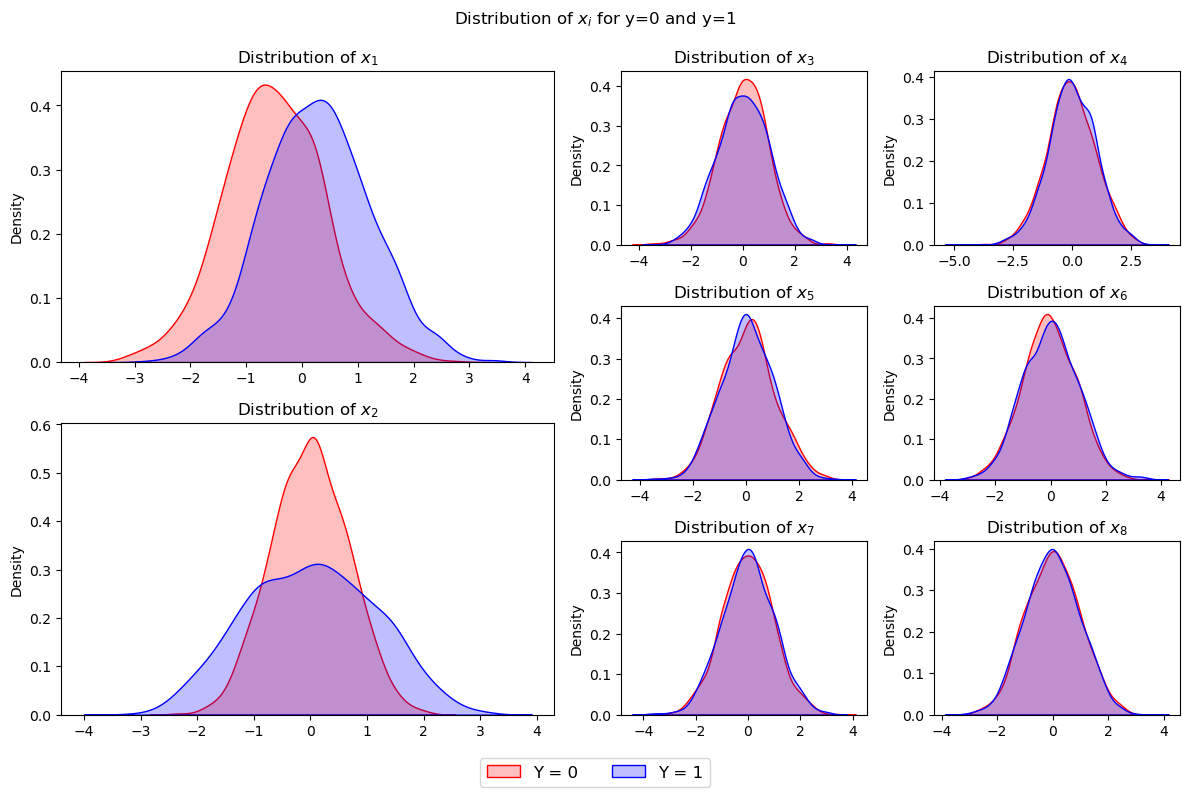

In [7]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Set up the figure and GridSpec
fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(6, 3, width_ratios=[2, 1, 1], height_ratios=[1, 1, 1, 1, 1, 1])

# Density ax for x1 and x2
ax1 = fig.add_subplot(gs[0:3, 0])
ax2 = fig.add_subplot(gs[3:6, 0])

# Density ax for the other xs
ax3 = fig.add_subplot(gs[0:2, 1])
ax4 = fig.add_subplot(gs[0:2, 2])
ax5 = fig.add_subplot(gs[2:4, 1])
ax6 = fig.add_subplot(gs[2:4, 2])
ax7 = fig.add_subplot(gs[4:6, 1])
ax8 = fig.add_subplot(gs[4:6, 2])

ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

# plot density for x
for i, ax in enumerate(ax):
    x_i = X[:, i]

    sns.kdeplot(x_i[Y == 0], ax=ax, color="red", fill=True, label="Y = 0")
    sns.kdeplot(x_i[Y == 1], ax=ax, color="blue", fill=True, label="Y = 1")

    ax.set_title(f"Distribution of $x_{i+1}$")

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=2, fontsize=12)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.suptitle("Distribution of $x_i$ for y=0 and y=1")
plt.show()

#### Conclustion

We observe that $x_1$ and $x_2$ have a particular relationship with $y$ compared to other $x_i$. Specifically, the density functions of $x_1$ and $x_2$ differ noticeably between $y = 0$ and $y = 1$, while other $x_i$​ variables show little to no difference. In the context of classification problem, $x_1$ and $x_2$ provide us some valuable information to seperate $y = 0$ from $y = 1$. In contrast, the remaining $x_i$ variables have low or no importance in distinguishing between values of $y$

- For $x_1$: we can see that there is a decision boundary that we can use to seperate the value of $y$. We know that our true underlying logit function is a linear function of $x_1$, thus there exists a "shift" from density function for $y = 0$ to $y = 1$. 

- For $x_2$: since our logit function is a quadratic function w.r.t $x_2$, there is not a decision boundary that we can use to seperate value of $y$. Regardless, distribution of $y = 1$ is more spread out than that of $y = 0$. 

- Other $x_i$ variables does not provide any valuable information. We can expect that coefficients for these variables will mostly be 0. 

## Exercise 4

In this exercise, we will implement Gradient Descent (GD) and Stochastic Gradient Descent (SGD) algorithm for optimization problem. 

Our goal is to find the logistic regression estimator, defined as Empirical risk minimizer for risk function: 

$$
\beta_n \in \arg \min_{\beta \in \mathbb{R}^{p+1}} \left( -\sum_{i=1}^{n} \left( Y_i \log(q_{\beta}(X_i)) + (1 - Y_i) \log(1 - q_{\beta}(X_i)) \right) \right)
$$

with sigmoid function is:

$$
q_{\beta}(x) = \frac{\exp(\beta_0 + \beta^T x)}{1 + \exp(\beta_0 + \beta^T x)}
$$

### Calculate the Gradient of Risk function

First we need to calculate the Gradient of the risk function $\hat{R}_{(\beta)}$ with respect to $\beta$. We will use the average of risk function to have something more like a probability distribution. 

Our objective function is:

$$
\beta_n \in \arg \min_{\beta \in \mathbb{R}^{p+1}} \left( - \frac{1}{n} \sum_{i=1}^{n} \left( Y_i \log(q_{\beta}(X_i)) + (1 - Y_i) \log(1 - q_{\beta}(X_i)) \right) \right)
$$

Notice that we have $\beta \in \mathbb{R}^{9}$ because we include the intercept $\beta_0$ in our calculation for convenience. For this reason, we will include a column of $1$ in our original $X$ matrix. 

$$
Z := 
\begin{bmatrix}
1 & x_1^T \\
1 & x_2^T \\
... & ... \\
1 & x_n^T
\end{bmatrix}
$$

**Math derivation**

The mathematical derivation is as follows:

$$
\begin{aligned}
\hat{R}(\beta) = - \sum_{i=1}^{n} \left(Y_i log(q_\beta(z_i)) + (1 - Y_i) log(1 - q_\beta(z_i))\right) \\
= - \sum_{i=1}^{n} \left( 
    Y_i log \left( \frac{q_\beta(z_i)}{1 - q_\beta (z_i)}\right) + log(1 - q_\beta(z_i))
    \right) \\ 
    
= - \sum_{i=1}^{n} \left(
        Y_i (\beta^T z_i) - log(1 + e^{\beta^T z_i}) 
    \right)
\end{aligned}
$$

Using the chain rule we have: 

$$
\nabla_\beta Y_i (\beta^T z_i) = z_i \\ 

\begin{aligned}

\nabla_\beta log(1 + e^{\beta^T z_i}) = \frac{\nabla f(.)}{\nabla log(.)} \frac{\nabla log(.)}{\nabla exp(.)} \\
    = \frac{1}{1 + e^{\beta^T z_i}} z_i e^{\beta^T z_i}
\end{aligned}
$$

$$
\nabla_b \hat{R}_{(\beta)} = \sum_{i=1}^{n} \left( z_i \left(Y_i - \frac{\exp(\beta^Tz_i)}{1 + \exp(\beta^Tz_i)} \right)\right) 

= \sum_{i=1}^{n} \left( z_i \left(Y_i - q_\beta (z_i) \right)\right) 
$$


### Gradient Descent algorithm

**Update rule**

For Gradient Descent, at each point of beta that we visit, we will calculate the gradient of the whole data set. 

Our update rule for $\beta_i$ is: 

$$
\beta_{t+1} = \beta_t − \gamma \nabla_{\beta} f(\beta_t)
$$

with $\gamma > 0 $ is learning rate. We will use decay learning rate which is defined as: $\gamma_t = 1/k$, $k$ being the current number of iteration.  

**Python Implementation**

In [12]:
def sigmoid(Z, beta):
    """
    Calcuate the sigmoid function at a point Z_i, Y_i
    Returns:
    sigmoid: array(n, 1) - predict probability y_hat
    """

    logit = Z.dot(beta)

    # Control logit to avoid overflow in exp function
    logit = np.clip(logit, -100, 100)

    sigmoid_ = np.exp(logit) / (1 + np.exp(logit))

    # Set up small epsilon to avoid log(0) = -inf
    epsilon = 1e-10
    sigmoid_ = np.clip(sigmoid_, epsilon, 1 - epsilon)

    return sigmoid_


def risk_beta(Z, Y, beta):
    """
    Calcuate the empirical risk of whole dataset at current value Z_i, Y_i
    Returns:
    risk_beta: scalar - risk valuated at current beta value.
    """

    Yhat = sigmoid(Z, beta)

    risk_beta = -(
        Y.T.dot(np.log(Yhat)) + (1 - Y).T.dot(np.log(1 - Yhat))
    )  # / Y.shape[0]
    return risk_beta


def gradient(Z, Y, Yhat):
    """
    Calcuate the gradient of loss function of whole dataset at current value Z_i, Y_i
    Returns:
    grad_: array(p, 1) gradient of funtion valuated at current beta value.
    """
    grad_ = -Z.T.dot((Y - Yhat)) / Z.shape[0]
    return grad_


def gradient_descent(X, Y, beta, iters):
    """
    Gradient Descent algorithm
    Returns:
    beta: array(p, 1) - logistic regression minimizer estimator
    log_risk: a list of log loss at each step.
    """

    N, p = X.shape  # Size of sample X

    # Add column=1 to X for intercept
    ones_column = np.ones((N, 1))
    Z = np.hstack((ones_column, X))

    # Initialize dict to store parameters
    hist = {}
    hist["beta"] = [beta.copy()]  # list to store beta value at each iteration
    hist["risk"] = [risk_beta(Z, Y, beta)]  # list to store risk value at each iteration
    hist["gradient"] = [] # list to store gradient value at each iteration

    # Execute loops
    for iter in range(iters):

        # calculate sigmoid fuction at current beta value
        Yhat = sigmoid(Z, beta)

        # learning rate
        lr = 1 / (iter + 1)

        # calculate gradient at current value
        dbeta = gradient(Z, Y, Yhat)

        # Update value of beta
        beta = beta - lr * dbeta

        # calculate risk at current beta value
        risk = risk_beta(Z, Y, beta)

        # Store values  of current iteration
        hist["beta"].append(beta.copy())
        hist["risk"].append(risk.copy())
        hist["gradient"].append(dbeta)

    return beta, hist

### Stochastic Gradient Descent (SGD)

For SGD, at each iteration we will only look at the gradient of 1 small batch of sample. 

**Update rule for SGD**

$$
\beta_{t+1} = \beta_t − \gamma \nabla_{\beta} f_{\xi_k}(\beta_t)
$$

with $\xi_k$ are i.i.d with uniform distribution on $(1, ..., n)$

**Number of evaluation for GD and SGD**

In this experience, we want GD and SGD to have the same number of evaluation. 

For:

- $K$: number of iteration for GD, 

- $n$: number of observation (our sample size), 

- $m$: number of observation in our batch size in SGD.

We will calculate the number of iteration for SGD as: 

$$
\tilde{K} = \frac{Kn}{m}
$$

**Python implementation**

In [13]:
def stochastic_gradient_descent(X, Y, beta, batch_size=10, iters=10):
    """
    Stochastic Gradient Descent algorithm
    Returns:
    beta: array(p, 1) - logistic regression minimizer estimator
    hist: a list of beta at each step.
    """

    N, p = X.shape  # Size of sample X

    # Add column=1 to X for intercept
    ones_column = np.ones((N, 1))
    Z = np.hstack((ones_column, X))

    # Initialize dict to store parameters
    hist = {}
    hist["beta"] = [beta.copy()]  # list to store beta value at each iteration
    hist["risk"] = [risk_beta(Z, Y, beta)]  # list to store risk value
    hist["gradient"] = []

    # Main loops
    for iter in range(iters):

        # Shuffle data at the start of each iteration
        # take a random batch of size batch_size
        indices = np.random.choice(N, size=batch_size)
        Z_batch = Z[indices]
        Y_batch = Y[indices]

        # calculate sigmoid fuction at current beta value
        Yhat = sigmoid(Z_batch, beta)

        # learning rate
        lr = 1 / (iter + 1)

        # calculate gradient at current value
        dbeta = gradient(Z_batch, Y_batch, Yhat)

        # Update value of beta
        beta = beta - lr * dbeta

        # calculate risk at current beta value
        risk = risk_beta(Z, Y, beta)

        # Store values  of current iteration
        hist["beta"].append(beta.copy())
        hist["risk"].append(risk.copy())
        hist["gradient"].append(dbeta)

    return beta, hist

### Train our model

We will use function `generate_data` from [Exercise 3](#exercise-3) to generate our test data X and Y. 

In [24]:
# Parameters
seed_train = 2796  # same as exercise 3
N_train = 3000  # same as exercise 3
p_train = 8  # same as exercise 3

# Generate train data
X_train, Y_train = generate_data(seed=seed_train, n=N_train, p=p_train)

# Initialize parameters
iter_gd = 100  # number of iterations for GD
batch_size = 30  # batch size for SGD
iter_sgd = (
    X_train.shape[0] * iter_gd / batch_size
)  # calculate number of iteration for SGD

# Initialize beta value
beta_init = np.zeros(X_train.shape[1] + 1)

# Train model with Gradient Descent method
beta_gd, hist_gd = gradient_descent(
    X=X_train, Y=Y_train, beta=beta_init, iters=int(iter_gd)
)

# Train model with Stochastic Gradient Descent method
beta_sgd, hist_sgd = stochastic_gradient_descent(
    X=X_train, Y=Y_train, beta=beta_init, batch_size=batch_size, iters=int(iter_sgd)
)

In [16]:
def print_beta(beta):
    # Function to print beta coefficient

    print("---Final optimized beta--- \n")
    print(f'{"Intercept":<15} {beta[0]:>10.6f}')
    print("Coefficient:")
    for i, beta in enumerate(beta[1:]):
        # This is to seperate beta and gamma coeff when we increase the degree of our model
        if i <= 7:
            print(f"beta_{i+1:<10} {beta:>10.6f} [x{i+1}]")
        else:
            print(f"gamma_{i-7:<9} {beta:>10.6f} [x{i-7}^2]")


print("==== Gradient Descent ====")
print_beta(beta_gd)
print()
print("==== Stochastic Gradient Descent ====")
print_beta(beta_sgd)

==== Gradient Descent ====
---Final optimized beta--- 

Intercept         0.444339
Coefficient:
beta_1            0.549949 [x1]
beta_2            0.015497 [x2]
beta_3           -0.006715 [x3]
beta_4            0.024663 [x4]
beta_5           -0.010709 [x5]
beta_6            0.034528 [x6]
beta_7            0.018587 [x7]
beta_8           -0.004301 [x8]

==== Stochastic Gradient Descent ====
---Final optimized beta--- 

Intercept         0.603856
Coefficient:
beta_1            0.697680 [x1]
beta_2            0.009452 [x2]
beta_3           -0.016956 [x3]
beta_4            0.015118 [x4]
beta_5           -0.025491 [x5]
beta_6            0.065026 [x6]
beta_7           -0.007553 [x7]
beta_8           -0.015608 [x8]


We can visualize the descent of log-loss function over our iteration. We notice that during first 6-7 iteration, the loss function decreases more rapidly, then it slows down. This is because we use a decay learning rate, so the adjustment we apply to $\beta$ will be smaller after each iteration. This helps use avoid situation in which we jump pass the minimal point of function. 

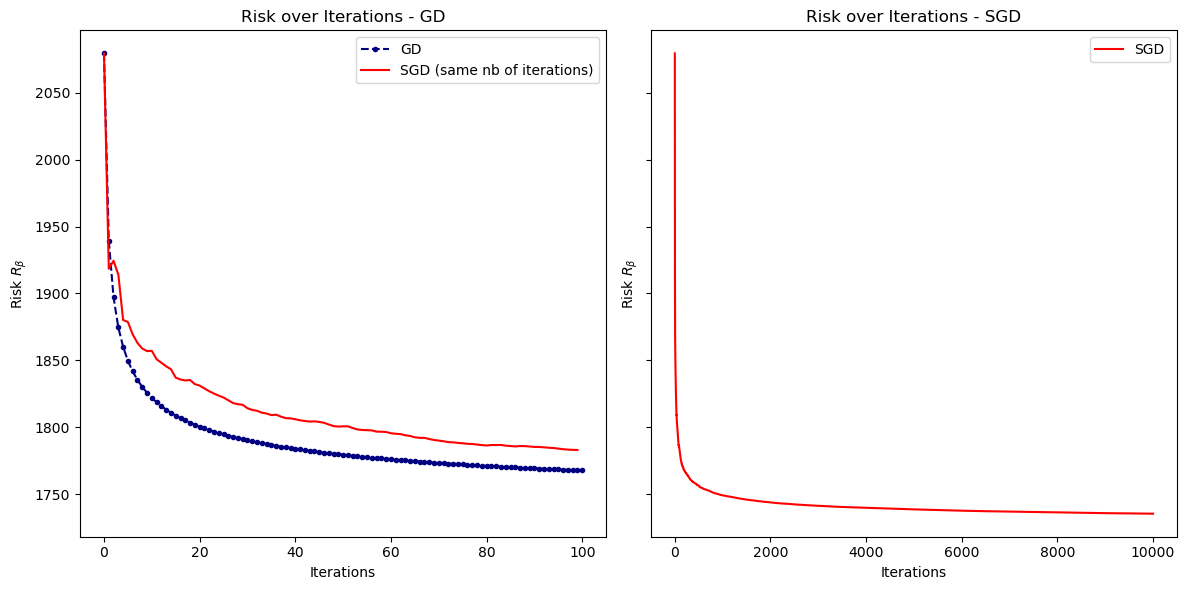

In [17]:
# Plot the loss over iterations
# hist_risk_gd = risk_beta_hist(X_train, Y_train, hist_gd["beta"])
# hist_risk_sgd = risk_beta_hist(X_train, Y_train, hist_sgd["beta"])

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot the risk for Gradient Descent
ax[0].plot(hist_gd["risk"], "o--", color="navy", markersize=3, label="GD")
ax[0].plot(
    hist_sgd["risk"][:iter_gd], "-", color="r", label="SGD (same nb of iterations)"
)
ax[0].set_xlabel("Iterations")
ax[0].set_ylabel("Risk $R_{\\beta}$")
ax[0].set_title("Risk over Iterations - GD")
ax[0].legend()

# Plot the risk for Stochastic Gradient Descent
ax[1].plot(hist_sgd["risk"], "-", color="r", label="SGD")
ax[1].set_xlabel("Iterations")
ax[1].set_ylabel("Risk $R_{\\beta}$")
ax[1].set_title("Risk over Iterations - SGD")
ax[1].legend()

plt.tight_layout()
plt.show()

We can also visualize the trajectory of loss function using a contour plot. Since we have $p=8$ features, our parameter space is $\beta \in \R^9$ (include intercept), we will only choose a $\R^2$ space to project our function. We will shows contour plot in parameter space of pair of 2 parameter values.

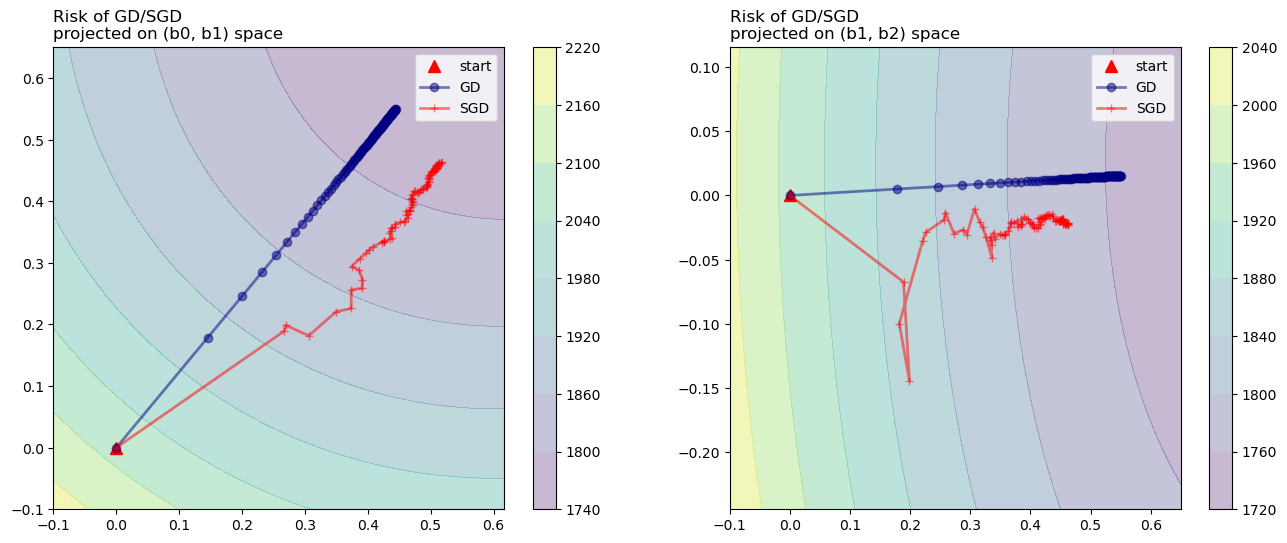

In [19]:
def plot_risk_contour(ax, X, Y, beta, hist_gd, hist_sgd, b1_index, b2_index):
    """
    Plot the risk contour by:
    Calculate risk w.r.t to 2 features
    Keeping all other coefficient fix with optimized value.
    """
    N = X.shape[0]
    Z = np.hstack((np.ones((N, 1)), X))
    nb_iter = len(hist_gd["beta"])  # take the number of iteration of GD

    bgd = np.asarray(hist_gd["beta"])
    bsgd = np.asarray(hist_sgd["beta"][:nb_iter])

    # define a range of value for axis
    min_beta1 = min(bgd[:, b1_index].min(), bsgd[:, b1_index].min())
    max_beta1 = max(bgd[:, b1_index].max(), bsgd[:, b1_index].max())
    min_beta2 = min(bgd[:, b2_index].min(), bsgd[:, b2_index].min())
    max_beta2 = max(bgd[:, b2_index].max(), bsgd[:, b2_index].max())

    range_b1 = np.linspace(min_beta1 - 0.1, max_beta1 + 0.1, 50)
    range_b2 = np.linspace(min_beta2 - 0.1, max_beta2 + 0.1, 50)

    B1, B2 = np.meshgrid(range_b1, range_b2)

    # calculate grid of value for each value beta1, beta2
    R = []
    for b1, b2 in zip(np.ravel(B1), np.ravel(B2)):
        beta[b1_index] = b1
        beta[b2_index] = b2
        R.append(risk_beta(Z, Y, beta))
    R = np.array(R).reshape(B1.shape)

    CS = ax.contourf(B1, B2, R, cmap="viridis", alpha=0.3)  # contour space
    plt.colorbar(CS, ax=ax)

    return ax


def plot_risk_trajectory(ax, hist_gd, hist_sgd, b1_index, b2_index):
    """
    Plot the risk trajectory
    """

    nb_iter = len(hist_gd["beta"])
    bgd = np.asarray(hist_gd["beta"])
    bsgd = np.asarray(hist_sgd["beta"][:nb_iter])

    # Plot starting point
    ax.plot(
        bgd[:, b1_index][0],
        bgd[:, b2_index][0],
        "^",
        label="start",
        color="red",
        markersize=8,
    )

    # beta trajectory of GD
    ax.plot(
        bgd[:, b1_index],
        bgd[:, b2_index],
        "o-",
        lw=2,
        alpha=0.5,
        color="navy",
        label="GD",
    )

    # beta trajectory of SGD
    ax.plot(
        bsgd[:, b1_index],
        bsgd[:, b2_index],
        "+-",
        lw=2,
        alpha=0.5,
        color="red",
        label="SGD",
    )

    ax.legend()
    ax.set_title(
        f"Risk of GD/SGD\nprojected on (b{b1_index}, b{b2_index}) space", loc="left"
    )

    return ax


# figure plot
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# plot risk contour for b_0 and b_1
plot_risk_contour(ax[0], X, Y, beta_sgd, hist_gd, hist_sgd, 0, 1)
plot_risk_trajectory(ax[0], hist_gd, hist_sgd, 0, 1)

# plot risk contour for b_1 and b_2
plot_risk_contour(ax[1], X, Y, beta_sgd, hist_gd, hist_sgd, 1, 2)
plot_risk_trajectory(ax[1], hist_gd, hist_sgd, 1, 2)


plt.legend()
plt.show()

We know that GD is deterministic since for each iteration, we calculate the gradient of the whole dataset and use it to jump to our next point. On the other hand, SGD is nondeterministic since our batch is choosen randomly for each iteration. 

We can visualize the randomness of SGD (versus GD) by running simulation with the same starting point: 

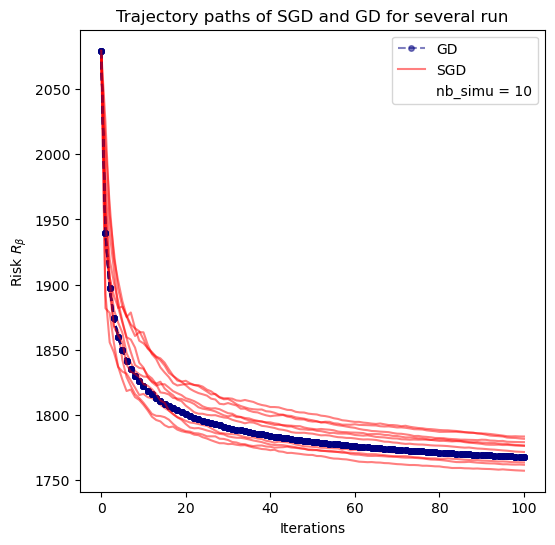

In [20]:
from matplotlib.lines import Line2D

# parameters
nb_simu = 10  # number of simulation
simu_gd = []  # list to store simu result for GD
simu_sgd = []  # list to store simu result for SGD

fig, ax = plt.subplots(figsize=(6, 6))

for i in range(nb_simu):
    # simulation for GD
    _, simu_hist_gd = gradient_descent(X=X_train, Y=Y_train, beta=beta_init, iters=100)
    simu_gd.append(simu_hist_gd["risk"])
    ax.plot(
        simu_hist_gd["risk"], "o--", color="navy", alpha=0.5, markersize=4, label="GD"
    )

    # simulation for SGD
    _, simu_hist_sgd = stochastic_gradient_descent(
        X=X_train, Y=Y_train, beta=beta_init, batch_size=batch_size, iters=100
    )
    simu_sgd.append(simu_hist_sgd["risk"])
    ax.plot(simu_hist_sgd["risk"], "-", color="r", alpha=0.5, label="SGD")


ax.set_xlabel("Iterations")
ax.set_ylabel("Risk $R_{\\beta}$")

# custom legend
custom_handles = [
    Line2D(
        [0],
        [0],
        linestyle="--",
        marker="o",
        color="navy",
        alpha=0.5,
        markersize=4,
        label="GD",
    ),
    Line2D([0], [0], linestyle="-", color="r", alpha=0.5, label="SGD"),
    Line2D([0], [0], linestyle="none", marker=" ", label=f"nb_simu = {nb_simu}"),
]


# plot_risk_contour(ax[1], X_train, Y_train, beta_sgd, hist_gd, hist_sgd, 0, 1)
plt.legend(handles=custom_handles, loc="upper right")
plt.title("Trajectory paths of SGD and GD for several run")
plt.show()

## Exercise 5

Now we will use our previous trained model to predict value of Y on a new test database. We will use misclassification rate as our model evaluation metric. The misclassification rate is defined as: 

$$
Misc = \hat{R_n}(\beta) = \frac{1}{n} \sum(\mathbb{1}_{Y_i \neq h_{\beta}(X_i)})
$$

with $h_{\beta}(X_i)$ is our prediction of $Y$ given $X_i$, and is calculated based on the logit function. We will use $0.5$ as our decision boundary: 

$$
h_{\beta}(X_i) = 
\begin{cases} 
    1 & \text{if } q_\beta(X_i) \geq 0.5, \\
    0 & \text{if } q_\beta(X_i) < 0.5.
\end{cases}
$$

**Python implementation**

In [25]:
def predict(X, Y, beta):
    """
    Calculate prediction of trained model.
    Returns:
    predict: dict that stores predicted probability of Y_hat, predicted value of Y_hat and misclassification rate.
    """
    N = X.shape[0]

    # Add 1 column to feature data
    Z = np.hstack((np.ones((N, 1)), X))

    # Dict object to store results
    predict = {}

    # Calculate predicted probability of Y
    predict_prob_y = sigmoid(Z, beta)
    predict["predict_prob_y"] = predict_prob_y

    # Calculate predict value of Y
    # based on predict probability
    predict_y = (predict_prob_y > 0.5).astype(int)
    predict["predict_y"] = predict_y

    # Calculate the misclassification rate
    misc_rate = (predict_y != Y).sum() / N
    predict["misc_rate"] = misc_rate

    return predict


# Generate test data
seed_test, N_test, p_test = 789, 1000, p_train
X_test, Y_test = generate_data(seed=seed_test, n=N_test, p=p_test)


# Predict test data using previous trained model
predict_gd = predict(X_test, Y_test, beta_gd)
predict_sgd = predict(X_test, Y_test, beta_sgd)

# Print the result
print("==== Gradient Descent Test Result====")
print(f"Misclassification rate: {predict_gd["misc_rate"]:.2%}")
print()
print("==== Stochastic Gradient Descent Test Result====")
print(f"Misclassification rate: {predict_sgd["misc_rate"]:.2%}")

==== Gradient Descent Test Result====
Misclassification rate: 29.20%

==== Stochastic Gradient Descent Test Result====
Misclassification rate: 29.50%


We see that both methods deliver quite averaged result. Both methods have around 30% misclassification rate, which means we get around 70% accurated result, which is better than a random coin toss but obviously far from a very good model. 

*Remark*: 

- The conclusion that whether GD and SGD is slightly better is actually nondeterministic since with difference test data set (changing the seed), we receive difference result. Since they are very closed to each other, we will not make any conclusion about which model is better.

We can run simulation for several tests to see the average performance of both method: 

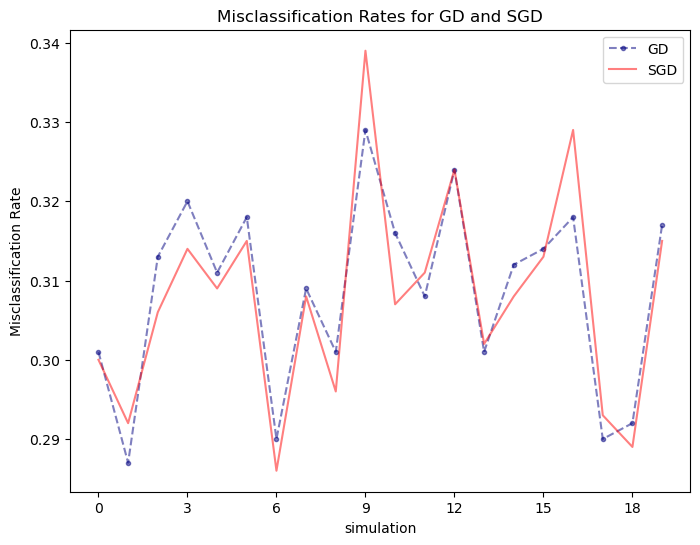

In [31]:
from matplotlib.ticker import MaxNLocator

nb_simu_test = 20  # number of simulation
misc_gd_ls = []  # list to store result of GD
misc_sgd_ls = []  # list to store result of SGD

# Run simulation loop
for i in range(nb_simu_test):

    X_test_simu, Y_test_simu = generate_data(seed=i, n=N_test, p=p_test)

    predict_gd_simu = predict(X_test_simu, Y_test_simu, beta_gd)
    predict_sgd_simu = predict(X_test_simu, Y_test_simu, beta_sgd)

    misc_gd_ls.append(predict_gd_simu["misc_rate"])
    misc_sgd_ls.append(predict_sgd_simu["misc_rate"])

# Plot the result

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(misc_gd_ls, "o--", color="navy", alpha=0.5, markersize=3, label="GD")
ax.plot(misc_sgd_ls, "-", color="r", alpha=0.5, label="SGD")

ax.set_xlabel("simulation")
ax.set_ylabel("Misclassification Rate")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title("Misclassification Rates for GD and SGD")
plt.legend()
plt.show()

We can see that during our simulation, the misclassification rates are mostly fall into range of 25% to 35%. This outcome is expected since we know our true logit function has a degree of 2, while we have chosen our model to have a degree of 1.

## Exercise 6

Now we consider more complexed model, with degree 2 - which is closer to our true function: 

$$
q_{\beta, \gamma}(x) = \frac{\exp(\beta_0 + \beta^T x + \gamma^T x^2)}{1 + \exp(\beta_0 + \beta^T x + \gamma^T x^2)}
$$

where $x \in \mathbb{R}^p \to x^2 \in \mathbb{R}^p$ is applied component-wise. 

Now for each iteration of GD and SGD, two vectors need to be updated: $\beta \in \mathbb{R}^{p+1}$ (include the intercept) and $\gamma \in \mathbb{R}^p$

We notice that $\beta$ and $\gamma$ are independent coefficient terms applied linearly to the input vector. So we can rewrite our logit function as: 

$$
\beta_0 + \beta^T x + \gamma^T x^2 = 

\begin{bmatrix}
1 & x_1^T & (x_1^2)^T \\
1 & x_2^T & (x_2^2)^T \\
... & ... & ... \\
1 & x_n^T & (x_n^2)^T
\end{bmatrix} \cdot

\begin{bmatrix} 
\beta_0 \\ 
\beta^T \\ 
\gamma^T 
\end{bmatrix} 

$$

$\rightarrow$ We not have to rewrite all of our function, we will first transform orgiginal dataset by concatenate the quadratic terms to it, and then we can process our SGD function as usual: 

$$
q_{\tilde{\beta}}(\tilde{X}) = \tilde{Z} \cdot \tilde{\beta}
$$

with: 

$$

\tilde{Z} = \begin{bmatrix} 1 & X & X^2\end{bmatrix}  \\

\tilde{Z}_i = 
\begin{bmatrix}
1 & x_{i1} & x_{i2} & ... & x_{ip} &
x_{i1}^2 & x_{i2}^2 & ... & x_{ip}^2
\end{bmatrix}^{T} \\


\tilde{\beta} = \begin{bmatrix} \beta_0 & \beta^T & \gamma^T \end{bmatrix} = 
\begin{bmatrix}
\beta_0 & \beta_1 & ... & \beta_p & \gamma_1 & ... & \gamma_p
\end{bmatrix}^T


$$

Notice that now our dimension has changed: $\tilde{X} \in \mathbb{R}^{n (1 + 2p)}$ and $\beta \in \mathbb{R}^{1+2p}$ (including bias term).

We can extract $\beta$ and $\gamma$ values from the results:

`intercept = tilde_beta[0]`

`beta = tilde_beta[1:9]`

`gamma = tilde_beta[9:17]`

**Python implementation**

In [33]:
# Transform original dataset
X_train_squared = X_train ** 2
X_train_quad = np.hstack((X_train, X_train_squared))

# We will use the same X_train, Y_train, X_test, Y_test dataset as before.
# Run SGD with the same number of iteration as the previous sgd
beta_init_quad = np.zeros(X_train_quad.shape[1] + 1)
beta_gamma_sgd_quad, hist_sgd_quad = stochastic_gradient_descent(
    X=X_train_quad, Y=Y_train, beta=beta_init_quad, batch_size=batch_size, iters=int(iter_sgd)
)


# Print results
print("==== Stochastic Gradient Descent (Quadratic model) ====")
print(f"Number of iterations: {iter_sgd:_.0f}")
print_beta(beta_gamma_sgd_quad)

==== Stochastic Gradient Descent (Quadratic model) ====
Number of iterations: 10_000
---Final optimized beta--- 

Intercept         0.011636
Coefficient:
beta_1            0.799767 [x1]
beta_2            0.066080 [x2]
beta_3           -0.019212 [x3]
beta_4            0.056806 [x4]
beta_5           -0.040783 [x5]
beta_6            0.106934 [x6]
beta_7            0.012340 [x7]
beta_8           -0.002319 [x8]
gamma_1          -0.043313 [x1^2]
gamma_2           0.731840 [x2^2]
gamma_3           0.077194 [x3^2]
gamma_4           0.011583 [x4^2]
gamma_5          -0.021641 [x5^2]
gamma_6           0.043357 [x6^2]
gamma_7           0.027348 [x7^2]
gamma_8          -0.000543 [x8^2]


#### Conclusion

We can clearly see the improvement of SGD when considering more complexed model:

- SGD has correctly reduce the coefficeint of the intercept to a near-zero value. Previously, the SGD result for model 1 has set intercept equal $0.617282$, which is as large as `beta_1`. 

- The two largest coefficients are `beta_1` (corresponding to $x_1$) and `gamma_2` (corresponding to $x_2^2$). We know that our true logit function for $q_{x}$ is: 

$$p(x) = \frac{\exp(x_1 + x_2^2 )}{1 + \exp(x_1 + x_2^2 )}$$

So, with the same number of iterations (which means same number of evaluation), SGD for model 2 has correctly chosen the important features in our dataset.

#### Misclassification rate with test data

We now test SGD for model 2 with the same test data `X_test`, `Y_test` in [Exercise 5](#exercise-5) and measure its performance using misclassification metric (the lower the misclassification rate, the better the model).

In [35]:
# Transform data to include 1 column and quadratic term
X_test_squared = X_test**2
X_test_quad = np.hstack((X_test, X_test_squared))

# Predict test data using previous trained model
predict_sgd_quad = predict(X_test_quad, Y_test, beta_gamma_sgd_quad)

# Print the result
print("==== Stochastic Gradient Descent (Model 1) Test Result====")
print(f"Misclassification rate: {predict_sgd["misc_rate"]:.2%}")
print()
print("==== Stochastic Gradient Descent (Model 2) Test Result====")
print("with quadratic term")
print(f"Misclassification rate: {predict_sgd_quad["misc_rate"]:.2%}")
print()

==== Stochastic Gradient Descent (Model 1) Test Result====
Misclassification rate: 29.50%

==== Stochastic Gradient Descent (Model 2) Test Result====
with quadratic term
Misclassification rate: 24.80%



With our test data, we see that even though Model 2 performs better than Model 1, our accuracy does not increase significantly. We reduce our misclassification rate about $5%$.

Similar to [Exercise 5](#exercise-5), we will try to run simulation several time with difference test data: 

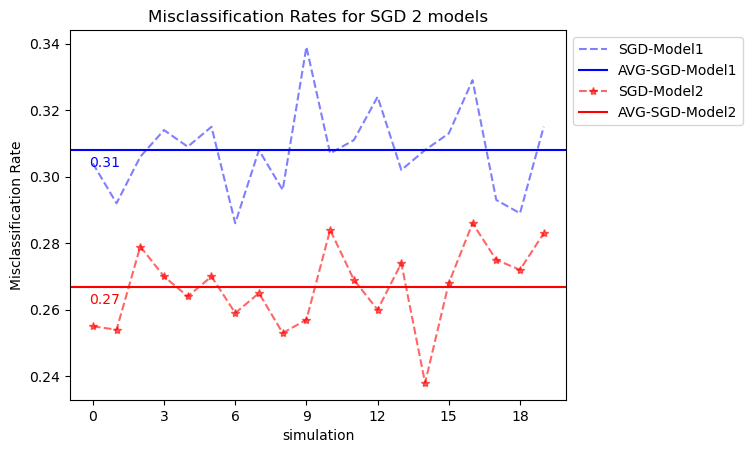

In [36]:
from matplotlib.ticker import MaxNLocator

nb_simu_test = 20
misc_sgd_model1 = []
misc_sgd_model2 = []

for i in range(nb_simu_test):
    X_test_simu, Y_test_simu = generate_data(seed=i, n=N_test, p=p_test)
    X_test_simu_squared = X_test_simu**2
    X_test_simu_quad = np.hstack((X_test_simu, X_test_simu_squared))

    predict_sgd_model1 = predict(X_test_simu, Y_test_simu, beta_sgd)
    predict_sgd_model2 = predict(X_test_simu_quad, Y_test_simu, beta_gamma_sgd_quad)

    # collect misclassification rate of each simulation
    misc_sgd_model1.append(predict_sgd_model1["misc_rate"])
    misc_sgd_model2.append(predict_sgd_model2["misc_rate"])

    # calculate average misclassification rate
    avg_misc_model1 = np.mean(misc_sgd_model1)
    avg_misc_model2 = np.mean(misc_sgd_model2)

# Plot the result
fig, ax = plt.subplots()

# Plot result for Model1
ax.plot(misc_sgd_model1, "--", color="blue", alpha=0.5, label="SGD-Model1")
ax.axhline(
    avg_misc_model1, linestyle="-", color="blue", alpha=1, label="AVG-SGD-Model1"
)
ax.text(
    0.5,
    avg_misc_model1 - 0.005,
    f"{avg_misc_model1:.2f}",
    ha="center",
    color="blue",
    fontsize=10,
)


# Plot result for Model2
ax.plot(misc_sgd_model2, "*--", color="r", alpha=0.6, label="SGD-Model2")
ax.axhline(avg_misc_model2, linestyle="-", color="r", alpha=1, label="AVG-SGD-Model2")
ax.text(
    0.5,
    avg_misc_model2 - 0.005,
    f"{avg_misc_model2:.2f}",
    ha="center",
    color="r",
    fontsize=10,
)

ax.set_title("Misclassification Rates for SGD 2 models")
ax.set_xlabel("simulation")
ax.set_ylabel("Misclassification Rate")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

From our simulation, we observed that Model 2 always outperforms Model 1. On average, Model 2 achieves a 27% misclassification rate, while Model 1 has an average misclassification rate of around 31%.

## Exercise 7

Now we will use logistic Lasso from the `scikit-learn` package to train Model1 and Model2. 

### Data generation

1. Previously, we generated train data set and test data set seperately. With `scikit-learn`, to follow general convention, we will create new data set and use `train_test_split` function. Our new dataset will have 5000 observations, with 80% will be used for training and 20% for testing. 

2. Our current 2 models are: 

- Model 1: only include linear term of features

$$
x_i = 
\begin{bmatrix}
x_1 & x_2 & ... & x_8
\end{bmatrix}
$$

- Model 2: we add quadratic term of features to Model 1

$$
x_i = 
\begin{bmatrix}
x_1 & x_2 & ... & x_8 & x_1^2 & x_2^2 & ... & x_8^2
\end{bmatrix}
$$

- Model 3: Additionally, `sklearn` has a `PolynomialFeatures` that generates a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the given degree [(sklearn poly-feature)](https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.PolynomialFeatures.html). We will create our Model 3 wih this also for comparison. 

In our example, our model will be: 

$$
x_i = 
\begin{bmatrix}
x_1 & x_2 & ... & x_8 & x_1^2 & x_1 x_2 & x_2^2 & ... & x_7 x_8 & x_8^2
\end{bmatrix}
$$

In [37]:
# Generate and preprocessing data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

X, Y = generate_data(seed=100, n=5000, p=8)

# Model 1 Data:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=10
)

# Model 2 Data:
X_train_2, X_test_2 = np.hstack((X_train, X_train**2)), np.hstack((X_test, X_test**2))

# Model 3 Data:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_3, X_test_3 = poly.fit_transform(X_train), poly.fit_transform(X_test)

# Final dataset
X_trains = (X_train, X_train_2, X_train_3)
X_tests = (X_test, X_test_2, X_test_3)

for i, (X_train_, X_test_) in enumerate(zip(X_trains, X_tests), start=1):
    print(f"Model {i}")
    print(f"X_train shape: {X_train_.shape}")
    print(f"X_test shape: {X_test_.shape}")

Model 1
X_train shape: (4000, 8)
X_test shape: (1000, 8)
Model 2
X_train shape: (4000, 16)
X_test shape: (1000, 16)
Model 3
X_train shape: (4000, 44)
X_test shape: (1000, 44)


### Train models using Logistic LASSO

Our objective function with LASSO regularization is: 

$$
\beta_n \in \arg \min_{\beta} \left( -\sum_{i=1}^{n} \left( Y_i \log(q_{\beta}(X_i)) + (1 - Y_i) \log(1 - q_{\beta}(X_i)) \right) \right) + \lambda |\beta|
$$

with $\lambda$ is the regularizer parameter. 

There are several methods to train a model with l1-norm in `scikitlearn`. We will focus on 2 popular methods: 

- `LogisticRegression`

- `SGDClassifier`

#### 1. LogisticRegression method

`scikit-learn` provides [`LogisticRegressionCV`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html) that perform logistic regression with built-in cross-validation to optimize parameter $\lambda$.

- The value for $\lambda$ is controlled by parameter `Cs` and can be accessed by model attribute `C_`. Each of the values in `Cs` describes the inverse of regularization strength. If `Cs` is as an int, then a grid of Cs values are chosen in a logarithmic scale between $10^{-4}$ and $10^{4}$. Note that since this is the inverse of $\lambda$, smaller values of `C_` means larger value for $\lambda$, which specifies stronger regularization.

- We will use cross-validation for tunning our parameter. 

- `LogisticRegressionCV` trains the model with LASSO regularization (l1-norm) with `liblinear` [solver](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression), which uses coordinate descent method. To apply Stochastic Gradient Descent method, we will use `SGDClassifier` class, as explained below. 

#### 2. SGDClassifier

We can also use [`SGDClassifier`](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier) class with argument `loss=log_loss` to perform logistic classification. Unlike `LogisticRegression`, `SGDClassifier` control the value of $\lambda$ directly, with parameter `alpha`.

Also, there's no built-in cross-validation class for parameter tunning. We will use [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to wrap around `SGDClassifier` in order to find best value for $\lambda$. 

>Reference:   
>[LogisticRegressionCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html)  
>[Lasso model](https://scikit-learn.org/stable/modules/linear_model.html#lasso)  
>[SGDClassifier](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.SGDClassifier.html)  
>[GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)  

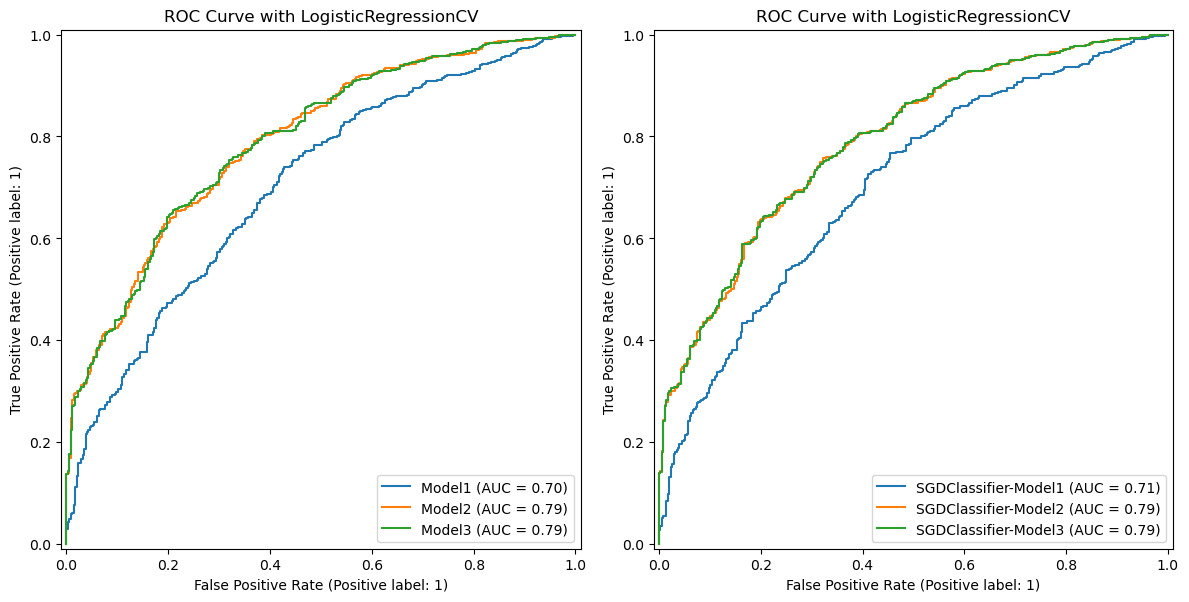

In [38]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import RocCurveDisplay
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Use LogisticRegressionCV

# List to store trained models.
models = []

for i, (X_train_, X_test_) in enumerate(zip(X_trains, X_tests), start=1):
    model = LogisticRegressionCV(
        Cs=10,
        cv=10,
        max_iter=1000,
        random_state=123,
        penalty="l1",
        solver="liblinear",
        scoring="accuracy",
    ).fit(X_train_, Y_train)
    models.append(model)
    RocCurveDisplay.from_estimator(model, X_test_, Y_test, ax=axs[0], name=f"Model{i}")

axs[0].set_title("ROC Curve with LogisticRegressionCV")


# Use SGDClassifier

# define parameter grid to fine tune alpha value
# use 10 values from 1e-4 to 1e4
param_grid = {"alpha": np.logspace(-4, 4, 10)}

# SGD Classifier
sgd_clf = SGDClassifier(
    loss="log_loss",
    penalty="l1",
    random_state=123,
    max_iter=1000,
    learning_rate="optimal",
)

models_sgd = []

# Using GridsearchCV for 3 models
for i, (X_train_, X_test_) in enumerate(zip(X_trains, X_tests), start=1):
    model = GridSearchCV(sgd_clf, param_grid, cv=10, scoring="accuracy").fit(
        X_train_, Y_train
    )
    models_sgd.append(model)
    RocCurveDisplay.from_estimator(
        model.best_estimator_,
        X_test_,
        Y_test,
        ax=axs[1],
        name=f"SGDClassifier-Model{i}",
    )

axs[1].set_title("ROC Curve with LogisticRegressionCV")

plt.tight_layout()
plt.show()

In [39]:
print("Optimized value for regularization parameter")
print("=" * 80)
print("LogisticRegressionCV")
print("Parameter: C_")
for i, model in enumerate(models, start=1):
    print(f"Model {i}: {model.C_[0]:.5f}")
print("-" * 80)

print("SGDClassifier")
print("Parameter: alpha")
for i, model in enumerate(models_sgd, start=1):
    print(f"Model {i}: {model.best_params_['alpha']:.5f}")

Optimized value for regularization parameter
LogisticRegressionCV
Parameter: C_
Model 1: 0.04642
Model 2: 0.04642
Model 3: 0.00599
--------------------------------------------------------------------------------
SGDClassifier
Parameter: alpha
Model 1: 0.00077
Model 2: 0.00599
Model 3: 0.00599


### Conclusion

We see that `LogisticRegressionCV` and `SGDClassifier` achieve quite similar result. 

- Model2 and Model3 are better than Model1 in term of ROC and AUC, which represent the trade off between True Positive Rate (TPR) and False Positive Rate (FPR). In other words, to achieve the same TPR, Models 2 and 3 yield a lower FPR, whereas Model 1 results in more incorrect predictions.

- Even though Model2 (our quadratic model) and Model3 (`sklearn` model transformation) have different number of features, they have almost the same result of ROC and AUC. This is because LASSO also performs feature selection by forcing unimportant features to have coefficients equal to zero.

We can check the sparsity of the trained models. We see that LASSO eliminates almost all of features in Model3, and only returns 2 non-zero coefficient. 

In [40]:
# Calculate model sparsity
print("Model sparsity (LogisticRegressionCV)")
print("=" * 80)
for i, model in enumerate(models, start=1):
    model_coef = model.coef_
    nb_coef = model_coef.shape[1]
    nb_zero_coef = np.sum(model.coef_ == 0)
    sparsity = nb_zero_coef / nb_coef * 100
    print(f"Model {i}:")
    print(f"\tNumber of coef: {nb_coef}")
    print(f"\tNumber of zero coef: {nb_zero_coef}")
    print(f"\tSparsity: {sparsity:.2f}%")


Model sparsity (LogisticRegressionCV)
Model 1:
	Number of coef: 8
	Number of zero coef: 2
	Sparsity: 25.00%
Model 2:
	Number of coef: 16
	Number of zero coef: 4
	Sparsity: 25.00%
Model 3:
	Number of coef: 44
	Number of zero coef: 42
	Sparsity: 95.45%


## Exercise 8

### Data import and cleaning

First we will import the data directly from url .

Next, we will perform some basic initial data analysis to gain insight into our dataset. Some simple questions we try to address such as: 

- How many observations in the data?

- What will be our feature columns and target column(s). Other columns will be removed. 

- Is there any missing data? Is there any duplicated data? 

In [41]:
import pandas as pd

# Load data
url = "https://www.dropbox.com/scl/fi/9uz7mu64ew91go651qn11/spam.csv?rlkey=rp07p7kmt27gox1c3sckeehdo&e=1&st=yky8ql7n&dl=1"
data = pd.read_csv(url, encoding="ISO-8859-1")

data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [42]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [44]:
# We only keep the first 2 columns
data = data.iloc[:, :2]
data = data.rename(columns={"v1": "label", "v2": "text"})

# Encode spam data as 1 and ham data as 0
data["spam"] = data["label"].apply(lambda x: 1 if x == "spam" else 0)
print(data.head())

  label                                               text  spam
0   ham  Go until jurong point, crazy.. Available only ...     0
1   ham                      Ok lar... Joking wif u oni...     0
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     1
3   ham  U dun say so early hor... U c already then say...     0
4   ham  Nah I don't think he goes to usf, he lives aro...     0


In [45]:
# Check for missing data
data.isnull().sum()

label    0
text     0
spam     0
dtype: int64

In [46]:
# Check for duplicated data
data.duplicated().sum()
data[data.duplicated()]

,label,text,spam
102,ham,As per your request 'Melle Melle (Oru Minnamin...,0
153,ham,As per your request 'Melle Melle (Oru Minnamin...,0
206,ham,"As I entered my cabin my PA said, '' Happy B'd...",0
222,ham,"Sorry, I'll call later",0
325,ham,No calls..messages..missed calls,0
...,...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...,1
5535,ham,"I know you are thinkin malaria. But relax, chi...",0
5539,ham,Just sleeping..and surfing,0
5553,ham,Hahaha..use your brain dear,0


In [47]:
# Remove duplicated data
data = data.drop_duplicates(keep="first")
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5169 non-null   object
 1   text    5169 non-null   object
 2   spam    5169 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 161.5+ KB


After cleaning, our data set has 5169 rows (observations) with our feature column is `text` and our targeted column is `spam`. 

In [48]:
# take spam column as our targeted Y array
Y = data["spam"].copy().to_numpy()
print(Y.shape)


# take text column as our feature X array
X = data["text"].copy().to_numpy()
print(X.shape)

(5169,)
(5169,)


### EDA (additional)

Now we will perform some explonatory data analysises to see if there're some important features that can be used to separate spam email from normal email. Since we are working with text classification, some characteristics (features) of the text we can use are:

- The number of characters in the text. 

- The number of words in the text.

- The number of sentences in the text.

- The number of uppercase words in the text. 

In [49]:
import re

data_eda = data.copy()

# calculate basic features of text
# number of characters
data_eda["nb_character"] = data_eda["text"].apply(lambda x: len(x))

# number of words
data_eda["nb_word"] = data_eda["text"].apply(lambda x: len(x.split()))

# number of capitalized words
data_eda["nb_cap"] = data_eda["text"].apply(
    lambda x: len([word for word in x.split() if word.isupper()])
)

# number of sentences
data_eda["nb_sentence"] = data_eda["text"].apply(
    lambda x: len([sent for sent in re.split(r"[.!?]+", x) if sent.strip()])
)

data_eda.head()

,label,text,spam,nb_character,nb_word,nb_cap,nb_sentence
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,20,0,3
1,ham,Ok lar... Joking wif u oni...,0,29,6,0,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,28,2,2
3,ham,U dun say so early hor... U c already then say...,0,49,11,2,2
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,13,1,1


In [50]:
data_eda.groupby("spam").describe().T

spam                          0           1
nb_character count  4516.000000  653.000000
             mean     70.459256  137.891271
             std      56.358207   30.137753
             min       2.000000   13.000000
             25%      34.000000  132.000000
             50%      52.000000  149.000000
             75%      90.000000  157.000000
             max     910.000000  224.000000
nb_word      count  4516.000000  653.000000
             mean     14.134632   23.681470
             std      11.116240    5.967672
             min       1.000000    2.000000
             25%       7.000000   22.000000
             50%      11.000000   25.000000
             75%      18.000000   28.000000
             max     171.000000   35.000000
nb_cap       count  4516.000000  653.000000
             mean      0.824181    2.545176
             std       2.674866    2.798969
             min       0.000000    0.000000
             25%       0.000000    1.000000
             50%       0.000000    2.000000
             75%       1.000000    4.000000
             max      37.000000   27.000000
nb_sentence  count  4516.000000  653.000000
             mean      2.099424    3.722818
             std       1.510418    1.792465
             min       1.000000    1.000000
             25%       1.000000    2.000000
             50%       2.000000    4.000000
             75%       3.000000    5.000000
             max      31.000000   10.000000

**Distribution of spam in our data set**

We see that in our dataset, we have more normal email than spam email. 

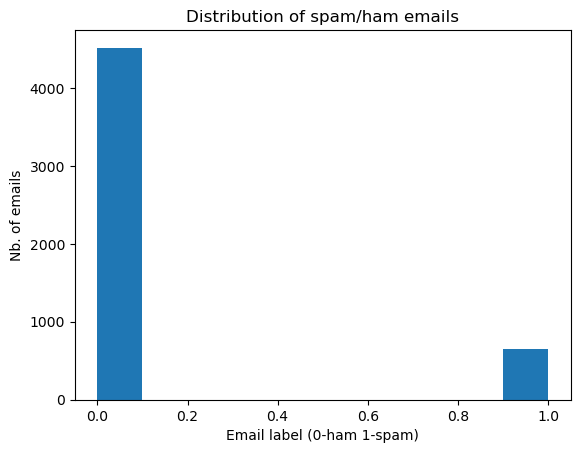

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(data_eda["spam"])
plt.title("Distribution of spam/ham emails")
plt.xlabel("Email label (0-ham 1-spam)")
plt.ylabel("Nb. of emails")
plt.show()

**Distribution of features for spam/normal emails**

Using the same method as previously in [Exercise 3](#exercise-3), we will plot the distribution of each feature against the label (`Y=0` or `Y=1`). The result shows that we obtained some quite distinctions between `spam` and `ham` email just by using some basic characteristics of the text, i.e: the number of characters, number of words, etc.... For example, normal emails on avrage has more characters/words than spam emails, as we can see a quite good boundary decision between spam and ham email. 

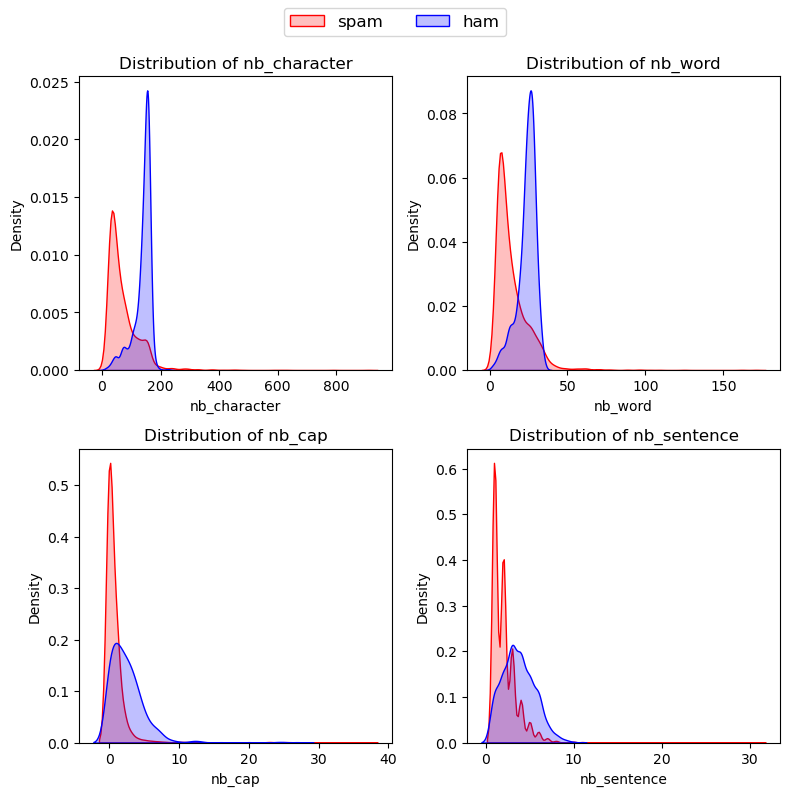

In [52]:
feature_cols = ["nb_character", "nb_word", "nb_cap", "nb_sentence"]

fig, ax = plt.subplots(2, 2, figsize=(8, 8))
ax = ax.flatten()

for i, f in enumerate(feature_cols):

    data_f = data_eda[f]
    sns.kdeplot(
        data_f[data_eda["spam"] == 0], ax=ax[i], color="red", fill=True, label="spam"
    )
    sns.kdeplot(
        data_f[data_eda["spam"] == 1], ax=ax[i], color="blue", fill=True, label="ham"
    )

    ax[i].set_title(f"Distribution of {f}")

# Show the plot
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=2, fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Text tokenization

Before training our classification models, we need to perform tokenization of the text features. We will use several text feature extraction methods provided by `scikit-learn` to transform our original dataset into numerical representation. 

1. **Bag-of-words representation with `CountVectorizer`**

Vectorization is the process of turning a collection of text documents into numerical feature vectors. With this method, we will tokenize strings and give an integer id for each possible token, by using white-spaces and punctuation as token separators. After this, we count the occurrences of tokens in each document. 

Return: a matrix representation of original text features in shape (n, m): with `n` is the number of observations and `m` is the number of tokenized word (our new feature)

*Remarks*: 

- This method ignores the relative position information of the words within the original text strings. 

- `CountVectorizer` also performs normalization of word token, it weights with diminishing importance tokens that occur in the majority of samples and only return tokens that appears in most documents. 
For example: we have 15.585 distinct words in our text features, yet `CountVectorizer` only returns 8672 tokens. 

2. **tf-idf representation with `TfidfTransformer`**

tf–idf means *term-frequency times inverse document-frequency*, the idea is that not all words carry the same level of meaningful information about the actual contents of the document. tf-idf addresses this issue by scaling down the impact of tokens that occur very frequently in our total text features, and that are less informative than features that occur in fewer text.

According to [scikit-learn documentation](https://scikit-learn.org/1.5/modules/feature_extraction.html#text-feature-extraction), the mathematic formula for tf-idf is: 

$$
\text{tf-idf}(t,d) = \text{tf}(t,d) \times \text{idf}(t) \\
\text{idf}(t) = log(\frac{1+n}{1+\text{df}(t)})
$$

with $n$: total number of texts and $\text{df}(t)$ is the number of texts that contains token $t$

>References:   
>[sciket-learn text feature extraction](https://scikit-learn.org/1.5/modules/feature_extraction.html#text-feature-extraction)  
>[CountVectorizer](https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)  
>[TfidfTransformer](https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html)   


In [54]:
# Total number of unique words 
unique_word = set(sum(data_eda["text"].apply(lambda x: x.split()).values, []))
print(f"Number of unique words: {len(unique_word)}")

Number of unique words: 15585


In [56]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Generate count matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["text"])
print(f"Matrix representation of vectorized X: {X.shape}")
print(f"Number of nonzero elements of X: \n{X.nonzero}\n")

# Apply TF-IDF transformation
tfidf_transformer = TfidfTransformer()
X_tf = tfidf_transformer.fit_transform(X)
print(f"Matrix representation of Tf-idf transformed X: {X_tf.shape}")

Matrix representation of vectorized X: (5169, 8672)
Number of nonzero elements of X: 
<bound method _spbase.nonzero of <5169x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 68018 stored elements in Compressed Sparse Row format>>

Matrix representation of Tf-idf transformed X: (5169, 8672)


### Train model with LASSO and Ridge

Similar to [Exercise 7](#exercise-7), we will apply 2 methods using different `scikit-learn` classes: `LogisticRegressionCV` (coordinate descent) and `SGDClassifier` (gradient descent). 

We will use some benchmarks and metrics to compare models:

- Runtime for training and testing. 

- Accuracy score with test dataset. 

- ROC and AUC metrics.

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV, SGDClassifier
from sklearn.metrics import accuracy_score
import time

# Split train and test data
# use 80% for training and 20% for testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_tf, Y, random_state=25, train_size=0.8
)

# Initialize parameters
randomstate = 123  # randomstate used for shuffling the data
max_iter = 1000  # set max nb of iteration
cv_fold = 10  # number of fold used in cross validation

# Initialize models
lasso_LogisticRegressionCV = LogisticRegressionCV(
    Cs=10,
    cv=cv_fold,
    max_iter=max_iter,
    random_state=randomstate,
    penalty="l1",
    solver="liblinear",
    scoring="accuracy",
)

ridge_LogisticRegressionCV = LogisticRegressionCV(
    Cs=10,
    cv=cv_fold,
    max_iter=max_iter,
    random_state=randomstate,
    penalty="l2",
    solver="liblinear",
    scoring="accuracy",
)

param_grid = {"alpha": np.logspace(-4, 4, 10)}

lasso_SGDClassfier = SGDClassifier(
    loss="log_loss",
    penalty="l1",
    random_state=randomstate,
    max_iter=max_iter,
    learning_rate="optimal",
)
lasso_SGDClassfier_CV = GridSearchCV(
    lasso_SGDClassfier, param_grid, cv=cv_fold, scoring="accuracy"
)

ridge_SGDClassifier = SGDClassifier(
    loss="log_loss",
    penalty="l2",
    random_state=randomstate,
    max_iter=max_iter,
    learning_rate="optimal",
)
ridge_SGDClassifier_CV = GridSearchCV(
    ridge_SGDClassifier, param_grid, cv=cv_fold, scoring="accuracy"
)


# Dict of models
clfs = {
    "lasso_LogisticRegressionCV": lasso_LogisticRegressionCV,
    "ridge_LogisticRegressionCV": ridge_LogisticRegressionCV,
    "lasso_SGDClassifier_CV": lasso_SGDClassfier_CV,
    "ridge_SGDClassifier_CV": ridge_SGDClassifier_CV,
}

# Dict to store results
results = {}
trained_models = {}

# Train each model using loop
for clf_name, clf in clfs.items():

    print("=" * 80)
    print(clf_name)
    print("_" * 80)

    # list to store result
    results[clf_name] = []

    # Benchmark: train time
    start_time = time.time()
    clf.fit(X_train, Y_train)
    train_time = time.time() - start_time
    print(f"train time: {train_time:.3}s")

    # Benchmark: test time
    start_time = time.time()
    Y_pred = clf.predict(X_test)
    test_time = time.time() - start_time
    print(f"test time:  {test_time:.3}s")

    # Benchmark: accuracy score
    accuracy = accuracy_score(Y_test, Y_pred)
    print(f"Accuracy score (test data): {accuracy * 100:.2f}%")

    # Calculate sparsity level of coefficient
    if clf.__class__.__name__ == "GridSearchCV":
        coef = clf.best_estimator_.coef_
    else:
        coef = clf.coef_
    sparsity_level = np.mean(coef == 0) * 100
    print(f"Sparsity level: {sparsity_level:.2f}%")

    # store results and metrics
    results[clf_name] = (train_time, test_time, accuracy, sparsity_level)
    # store trained models
    trained_models[clf_name] = clf
    print()

lasso_LogisticRegressionCV
________________________________________________________________________________
train time: 1.12s
test time:  0.000206s
Accuracy score (test data): 97.58%
Sparsity level: 85.54%

ridge_LogisticRegressionCV
________________________________________________________________________________
train time: 0.908s
test time:  0.000338s
Accuracy score (test data): 98.07%
Sparsity level: 12.73%

lasso_SGDClassifier_CV
________________________________________________________________________________
train time: 0.827s
test time:  0.000361s
Accuracy score (test data): 97.20%
Sparsity level: 96.39%

ridge_SGDClassifier_CV
________________________________________________________________________________
train time: 0.634s
test time:  0.000396s
Accuracy score (test data): 97.49%
Sparsity level: 12.73%



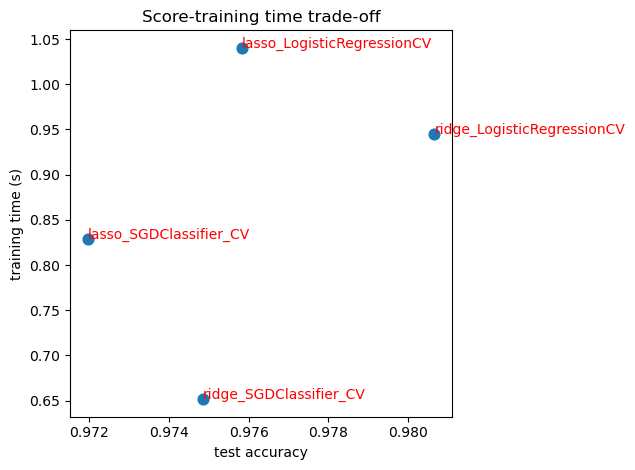

In [58]:
# Plot the trade-off between rumtime and accuracy

ls_train_time, ls_test_time, ls_accuracy = [
    [x[i] for _, x in results.items()] for i in range(3)
]
ls_model = [name for name, _ in results.items()]


fig, ax = plt.subplots()

ax.scatter(ls_accuracy, ls_train_time, s=60)
ax.set(
    title="Score-training time trade-off",
    # yscale="log",
    xlabel="test accuracy",
    ylabel="training time (s)",
)


for i, txt in enumerate(ls_model):
    ax.annotate(txt, (ls_accuracy[i], ls_train_time[i]), color="r")

plt.tight_layout()
plt.show()

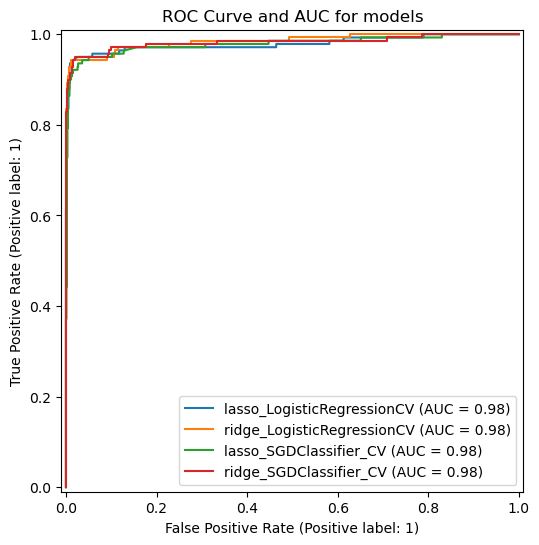

In [60]:
# ROC Curve and AUC

from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(figsize=(8, 6))

for name, model in trained_models.items():
    RocCurveDisplay.from_estimator(model, X_test, Y_test, ax=ax, name=f"{name}")

plt.title("ROC Curve and AUC for models")
plt.show()

### Conclusion

**Performance**

We see that there is trade-off between test accuracy and training time across the different models. Models with higher test accuracy tend to have slightly higher training times, indicating a potential cost in computational efficiency. 

In general, `SGDClassifier` is better in term of performance compared to `LogisticRegressionCV`. Models using Ridge have relatively lower training times compared to LASSO models, so Ridge regularization might be more computationally efficient in our case. 

LogisticRegressionCV with Ridge achieves the highest test accuracy among the models, and also has a medium training time, si it will be the best choice that balance the trade-off between accuracy and computational efficiency. 

On the other hand, Lasso SGDClassifier shows the lowest test accuracy, but it also has an acceptable training times. Ridge SGDClassifier has the fastest training time, making it a potentially faster choice when a slight reduction in accuracy is acceptable.

**ROC Curve and AUC**

In terms of ROC and AUC, all models achieve almost the same results. The 98% AUC values indicate that this is a very good model with the potential to achieve a very high True Positive Rate while maintaining a very low (close to zero) False Positive Rate.